# TSF GRIP Nov '20 DSBA Task 2
# Prediction Using Unsupervised ML
### From the given 'iris' dataset, predict the optimum number of clusters and represent it visually

## Name - Sarthak Yadav

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [6]:
#Obtaining data from source, loading into a pandas dataframe
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Verifying integrity of data

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.shape

(150, 6)

In [54]:
df['species_category']=df['Species'].astype("category")
df['species_category']=df['species_category'].cat.codes
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_category
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Obtaining optimum number of clusters

In [21]:
clus = df.iloc[:, [1,2,3,4]].values

In [22]:
from sklearn.cluster import KMeans as km

In [32]:
x=[]

In [33]:
for i in range(1,15):
    kmeans=km(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(clus)
    x.append(kmeans.inertia_)
    print('Number of clusters - ', i, " sum of squares - ", kmeans.inertia_)

Number of clusters -  1  sum of squares -  680.8244
Number of clusters -  2  sum of squares -  152.36870647733906
Number of clusters -  3  sum of squares -  78.94084142614602
Number of clusters -  4  sum of squares -  57.31787321428571
Number of clusters -  5  sum of squares -  46.53558205128205
Number of clusters -  6  sum of squares -  38.930963049671746
Number of clusters -  7  sum of squares -  34.318753220611924
Number of clusters -  8  sum of squares -  29.954086421037225
Number of clusters -  9  sum of squares -  27.992635739389613
Number of clusters -  10  sum of squares -  25.94725937001595
Number of clusters -  11  sum of squares -  24.44593206793207
Number of clusters -  12  sum of squares -  23.00555581918082
Number of clusters -  13  sum of squares -  21.913784823020116
Number of clusters -  14  sum of squares -  20.643787666581787


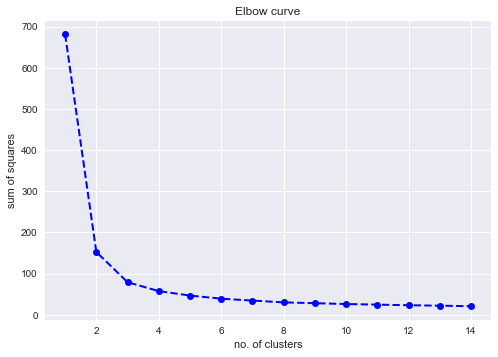

In [61]:
plt.plot(range(1,15), x, '--bo', linewidth='2')
plt.xlabel('no. of clusters')
plt.ylabel('sum of squares')
plt.title('Elbow curve')
plt.show()

#### As seen in the curve, we notice an "elbow" at k=3, and hence 3 clusters are optimum for this solution.

In [38]:
kmeans = km(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 42)
pred_kmeans = kmeans.fit_predict(clus)

In [39]:
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Plotting

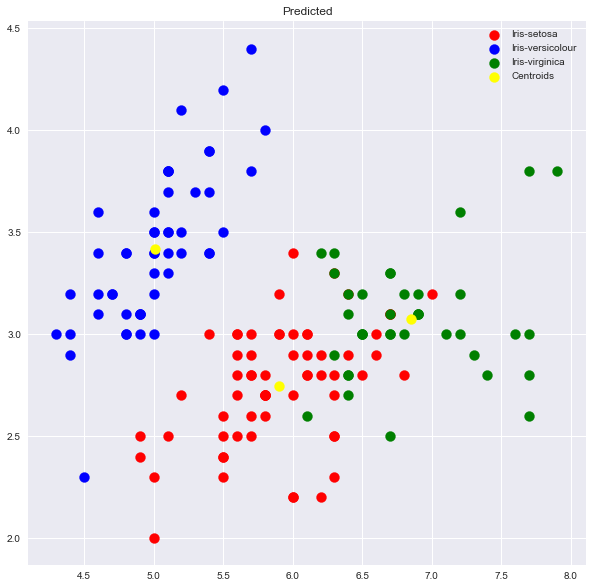

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(clus[pred_kmeans==0,0],clus[pred_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(clus[pred_kmeans==1,0],clus[pred_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(clus[pred_kmeans==2,0],clus[pred_kmeans==2,1],s=100,c='green',label='Iris-virginica')
plt.title('Predicted')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()